In [18]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy
import numpy as np

In [19]:
df = pd.read_csv('../../../examples/EFIplus_medit.zip',compression='zip', sep=";")

In [20]:
df.head()


,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True)

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

In [22]:
for name in df.columns:
    print(name)

Site_code
Latitude
Longitude
Country
Catchment_name
Water_source_type
Flow_regime
Altitude
Geological_typology
Actual_river_slope
Natural_sediment
Elevation_mean_catch
prec_ann_catch
temp_ann
temp_jan
temp_jul
Barriers_catchment_down
Barriers_river_segment_up
Barriers_river_segment_down
Barriers_number_river_segment_up
Barriers_number_river_segment_down
Barriers_distance_river_segment_up
Barriers_distance_river_segment_down
Impoundment
Hydropeaking
Water_abstraction
Hydro_mod
Temperature_impact
Velocity_increase
Reservoir_flushing
Sedimentation
Channelisation
Cross_sec
Instream_habitat
Riparian_vegetation
Embankment
Floodprotection
Floodplain
Toxic_substances
Acidification
Water_quality_index
Eutrophication
Organic_pollution
Organic_siltation
Total_fish_individuals
Total_sp
Abramis brama
Achondrostoma arcasii
Achondrostoma occidentale
Achondrostoma oligolepis
Acipenser naccarii
Alburnoides bipunctatus
Alburnus albidus
Alburnus alburnus
Alosa alosa
Alosa fallax
Ameiurus melas
Anaecypris

# Step 1

In [23]:
dfsalmo = df[df['Salmo trutta fario'] > 0]
dfsalmo.head()

,Site_code,Latitude,Longitude,Country,Catchment_name,Water_source_type,Flow_regime,Altitude,Geological_typology,Actual_river_slope,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,Groundwater,Permanent,1253,Calcareous,13.406,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,Groundwater,Permanent,1155,Calcareous,9.398,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,Groundwater,Permanent,1074,Calcareous,8.186,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,Groundwater,Permanent,1018,Calcareous,11.736,...,0,0,0,0,0,0,0,0,0,0
5,ES_02_0005,40.732830,-2.078003,Spain,Tejo,Pluvial,Permanent,979,Calcareous,2.670,...,0,0,0,0,0,0,0,0,0,0


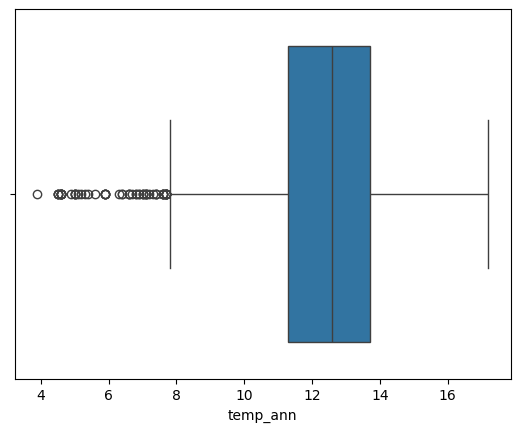

In [24]:
sns.boxplot(dfsalmo, x='temp_ann')
plt.show()

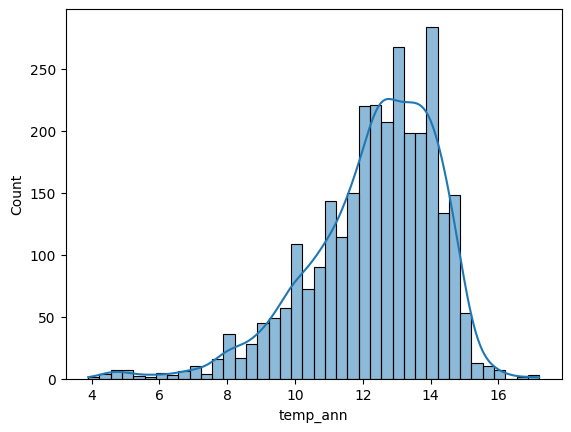

In [25]:
sns.histplot(dfsalmo, x='temp_ann', kde=True)
plt.show()

# Step 2

In [26]:
dfriver = df['Actual_river_slope']

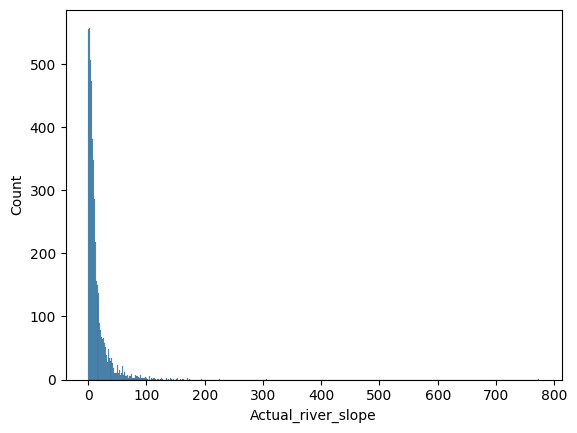

In [27]:
sns.histplot(dfriver)
plt.show()

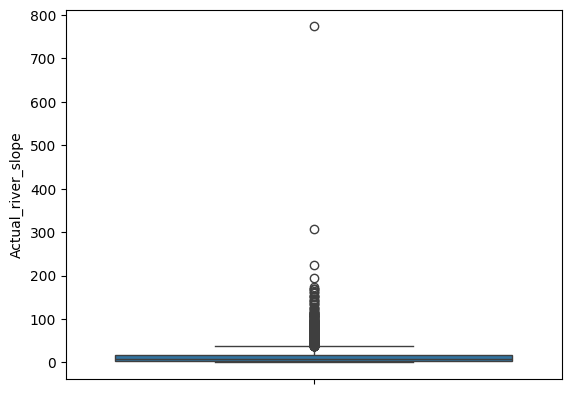

In [28]:
sns.boxplot(dfriver)
plt.show()

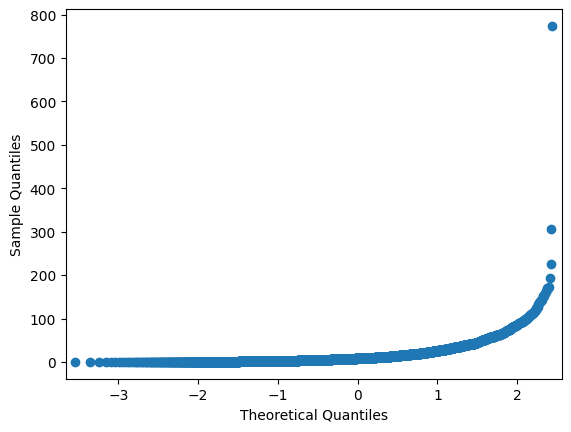

In [29]:
qqplot(dfriver, line='s')
plt.show()

Both histogram and boxplots do not look normal, and the qqplot is far off from a normal diagonal line

Shapiro-Wilk Test reliable with about 1000 or less observations. The warning given is p-value may not be accurate for over 5000 observations. Either way, incorrect p-value because too many data points

In [30]:
stat, p = scipy.stats.shapiro(dfriver)
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs with 3 decimal places
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=nan, p=1.000
Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The following 3 tests all show the actual_river_slope is not a normal distribution

In [31]:
stat, p = scipy.stats.normaltest(dfriver)
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=nan, p=nan
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


In [32]:
# K-S test
stat, p = scipy.stats.kstest(dfriver, 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=nan, p=nan
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


In [33]:
result = scipy.stats.anderson(dfriver)

print('Statistic: %.3f' % result.statistic)
print('critical values:', result.critical_values)
print('significance level (%):', result.significance_level)
print('Fit results:', result.fit_result)

p = 0
for i in range(len(result.critical_values)):
    slevel, cvalues = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (slevel, cvalues))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (slevel, cvalues))

Statistic: nan
critical values: [0.576 0.655 0.786 0.917 1.091]
significance level (%): [15.  10.   5.   2.5  1. ]
Fit results:   params: FitParams(loc=14.58243175879397, scale=22.596125027736853)
 success: False
 message: 'Optimization converged to parameter values that are inconsistent with the data.'
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


# Step 3

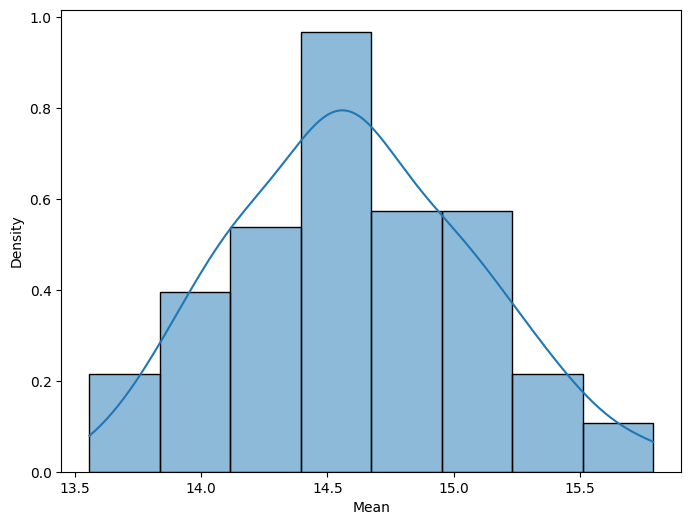

K2 Test
Statistics=1.329, p=0.515
Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)


In [86]:
sample_size = 2000
num_samples = 100
sample_slope_means = []

df_river_cleaned = df.dropna(subset=['Actual_river_slope'])

for _ in range(num_samples):
    sample = np.random.choice(df_river_cleaned['Actual_river_slope'], size=sample_size, replace=True)
    sample_slope_means.append(np.mean(sample))

df_means = pd.DataFrame(sample_slope_means, columns=['Mean'])

plt.figure(figsize=(8, 6))
sns.histplot(df_means['Mean'], kde=True, stat='density')
plt.show()

print("K2 Test")
stat, p = scipy.stats.normaltest(df_means['Mean'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')
